## ARIMA 모델을 이용한 유튜버 랄로 성장률 예측

In [108]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [109]:
df = pd.read_csv('data/Ralo_stat.csv',index_col = 'searchDate')

In [110]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-01-09,42420,36000,244,96,71
2020-01-10,42989,36100,245,96,71
2020-01-11,28867,36200,245,96,65
2020-01-12,22590,36200,245,96,62
2020-01-13,23108,36300,245,96,62
...,...,...,...,...,...
2021-02-05,587390,343000,316,97,99
2021-02-06,985741,346000,317,97,99
2021-02-07,663334,348000,317,97,99


## 컬럼 정리 (구독자 수만 남겨놓기) 

In [111]:
del df['dailyViewCount']

In [112]:
del df['videoCount']

In [113]:
del df['favorablePercent']

In [114]:
del df['activePercent']

In [115]:
df

,subscriberCount
searchDate,
2020-01-09,36000
2020-01-10,36100
2020-01-11,36200
2020-01-12,36200
2020-01-13,36300
...,...
2021-02-05,343000
2021-02-06,346000
2021-02-07,348000


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리
- 컬럼 크기에 따라 아래 값 계산 다름

In [116]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [117]:
train_df = df[:target_date]

In [118]:
test_df = df[target_date:]

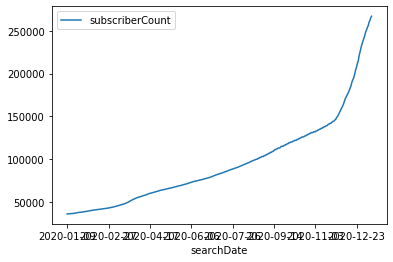

In [119]:
train_df.plot()
plt.show()

## ARIMA 모델 설계 및 학습

In [120]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [121]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  368
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2691.573
Method:                       css-mle   S.D. of innovations            361.623
Date:                Wed, 10 Feb 2021   AIC                           5395.145
Time:                        10:40:18   BIC                           5418.594
Sample:                             1   HQIC                          5404.461
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        956.9129    738.465      1.296      0.195    -490.452    2404.278
ar.L1.D.y      0.3563      0.084      4.235      0.000       0.191       0.521
ar.L2.D.y      0.6341      0.084      7.559      0.0

## 최종 30일 예측값 시각화

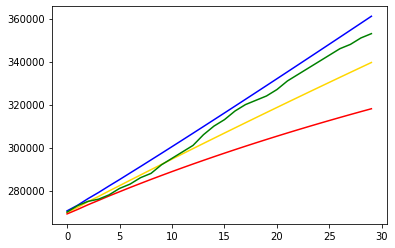

In [122]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터입니다. 
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.